https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet
# LEGEND: 
    gudieline = Black
    easy      = Blue
    Medium    = Green
    Hard      = Red
    VeryHard  = Pink
    Math      = Gray
    
<a id="table_content"> </a>
# Table of Content 
| Topic  | Concept            |
|--------|--------------------|
|Formulas|<a href="#formula_z_t_samp"> Z-score, T-score, standard-error[one sample, two sample]   </a> |
|Statistic|<a href="#sampling_estimate_population"> Sampling to estimate population  </a> |
|Statistic|<a href="#detecting_normal_distribution"> Detecting Normal Distribution </a>     |
|Statistic|<a href="#skewness_kurtosis">  Calculate Skewness and kurtosis </a>|
|Statistic|<a href="#confidence_interval">  Calculate Confidence interval</a>|
|Statistic|<a href="#effect_sizes"> Effect Sizes </a>|
|Statistic|<a href="#cohen_d"> Cohen's D Effect Size Calculation </a>|
|Statistic|<a href="#bayes"> Bayes </a>|
|Distribution|<a href="#poisson">  Poisson </a>|
|Distribution|<a href="#exponential">  Exponential</a>|
|Generate Distrubtion |<a href="#binomial_bernoulli_trial"> Randomly generate Binomial and Bernoulli trials. </a>         |
|Test  |<a href="#test_fast"> *Calculatinng Test (fast) </a>   |
|Test |<a href="#one_sample_z_test"> One sample Z - test  </a>         |
|Test |<a href="#one_sample_t_test"> One sample T - test  </a>         |
|Test |<a href="#two_sample_t_test"> Two sample T - test  </a>         |
|Test |<a href="#welch_t_test"> *Welch's t-test  </a>         |
|Test |<a href="#anova_table"> ANOVA table </a>         |
|Test |<a href="#power_beta"> Power Analysis and recommendation </a>|
|--------|--------------------|

##### Choosing a statitical test
    https://stats.idre.ucla.edu/other/mult-pkg/whatstat/
    https://online.stat.psu.edu/stat414/node/290/
    https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3116565/

<a id="formula_z_t_samp"> </a>
# Formulas - <span style="color:blue"> Z-score, T-score, standard-error[one sample, two sample],   </span>
</span> <a href="#table_content"> [Return to table]</a>


$$ \large \text{standard error} = \dfrac{\sigma}{\sqrt{n}} $$

$$ \large \text{z-statistic} = \dfrac{\bar x - \mu}{{\sigma}/{\sqrt{n}}} $$

$$ \large \text{t-statistic} = \dfrac{\bar x - \mu}{{S}/{\sqrt{n}}} $$


$$ \large \text{Standard error two sample t}  = \sqrt{\frac{\sigma_{1}^{2}}{n_{1}} + \frac{\sigma_{2}^{2}}{n_{2}}} $$


$$\large \text{Bayes}  P(A|B) = \frac{P(A)P(B|A)}{P(B)} $$

<a id="General_guides"> </a>
# Statistic - <span style="color:black"> Guidelines</span>
</span> <a href="#table_content"> [Return to table]</a>

### The Multiple Comparisons Problem
#### ----Spurious correlation 
    A Type 1 Error, meaning that it's a type of False Positive. With each comparison we make in an experiment, we try to set a really low p-value to limit our exposure to type 1 errors. owever, when we make multiple comparisons by checking for many things at once, each of the small risks of a Type 1 error becomes cumulative!
#### <span style="color:red"> ----The Bonferroni correction(FIGHT BACK/ FIX)</span>
    Due to the cumulative risk of drawing false conclusions when statistically testing multiple quantities simultaneously With the Bonferroni correction, you divide  $\alpha$  by the number of comparisons you are making to set a new, adjusted threshold rejecting the null hypothesis.

### Goodhart’s Law
    "Any measure which becomes a target ceases to be an effective measure!"
    Best example: https://en.wikipedia.org/wiki/Cobra_effect
    
    As a data scientist, it is important to communicate your results clearly to stakeholders -- but it is also important to be the voice of reason at times. he sooner you know how they plan on using your results, the more you can help them avoid ugly unforeseen problems that come from Goodhart's law

<a id="sampling_estimate_population"> </a>
# Statistic - <span style="color:green"> Sampling to estimate population </span>
</span> <a href="#table_content"> [Return to table]</a>

In [42]:
import numpy as np
import pandas as pd

df = pd.read_csv('titanic.csv')

population_mean = df.Age.mean()
sample_df = df.sample(n=50, random_state=22)         #Take a sample of 50 people
err = np.abs(sample_df.Age.mean() - population_mean) #Calculate error
per_err = err / population_mean                      #Define the percentage of the error

sample_means = []
for i in range(10**4):
    sample = df.sample(n=50, random_state=i)           #Take a sample of 50 people
    sample_means.append(sample.Age.mean())             #Calculate the sample mean and record it multiple times

mean_sample_means = np.mean(sample_means) 
err = np.abs(mean_sample_means - population_mean)      #Calculate error of mean of means
per_err = err / population_mean                        #Define the percentage of the error             #
acc = 1 - (np.abs(mean_sample_means - population_mean) / population_mean) #Accuracy


display(df.head(3))
#Calculate the Population and Sample mean
print(f'Population_age_mean: {population_mean} \nSample_age_mean: {sample_df.Age.mean()}') 
print(f'Error_from_first_sample: {err} \nPercentage_of_this_error: {per_err}')
print()
print(f'Mean of means: {np.mean(sample_means)}')
print(f'Error_mean_of_means: {err} \nPercentage_of_this_error: {per_err}')
print(f'Accuracy: {acc}')

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


Population_age_mean: 29.69911764705882 
Sample_age_mean: 27.79268292682927
Error_from_first_sample: 0.02097845708657431 
Percentage_of_this_error: 0.0007063663417842941

Mean of means: 29.678139189972246
Error_mean_of_means: 0.02097845708657431 
Percentage_of_this_error: 0.0007063663417842941
Accuracy: 0.9992936336582157


<a id="detecting_normal_distribution"> </a>
# Statistic - <span style="color:blue"> Detecting Normal Distribution </span>
</span> <a href="#table_content"> [Return to table]</a>

NormaltestResult(statistic=904.5872705326926, pvalue=3.727091062842147e-197)


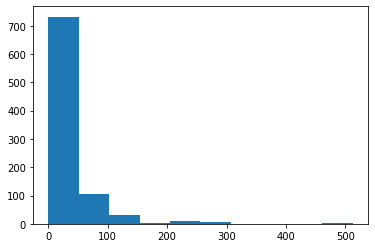

In [21]:
# Simply plot the data in a histogram and use intutiton to detemine if the distrubtion is normal.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as st

df = pd.read_csv('titanic.csv')
plt.hist(df['Fare']);
print(st.normaltest(df['Fare']))

<a id="binomial_bernoulli_trial"> </a>
# Statistic - <span style="color:blue"> Randomly generate Binomial and Bernoulli trials </span>
</span> <a href="#table_content"> [Return to table]</a>

78


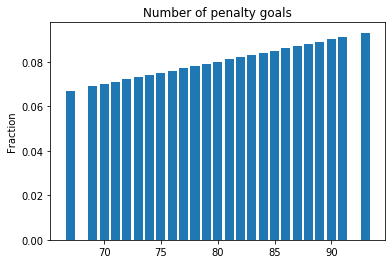

In [21]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(123) # set a seed to get the same results

#100 Bernoulli trial. Out of 100 results 78 where successes. The probability of success each time was 80%
print(np.random.binomial(n=100, p=0.8))

#Binomial trial == multiple benoulli trials
n = 1000
iteration = [ np.random.binomial(n=100, p=0.8) for _ in range(n)]
iteration = np.array(iteration)
probablity = iteration/n
plt.bar(iteration, probablity)
plt.ylabel('Fraction')
plt.title('Number of penalty goals');

<a id="skewness_kurtosis"> </a>
# Statistic - <span style="color:blue"> Calculate Skewness and kurtosis </span>
</span> <a href="#table_content"> [Return to table]</a>

#### [Use Case]
    - Skewness can esitmate a distrubtion better
    - Kurtosis is used to detect outliers. Useful in fruad detection


## Skewness
    ##### symmetrical
    A skewness between -0.5 and 0.5

    ##### moderately skewed
    A skewness between -1 and -0.5 (negatively skewed) or between 0.5 and 1 (positively skewed)

    ##### highly skewed
    A skewness smaller than -1 (negatively skewed) or bigger than 1 (positively skewed


## kurtosis
    ##### Mesokurtic ( kurtosis≈3 )
    A mesokurtic distribution has kurtosis statistics that lie close to the ones of a normal distribution. Mesokurtic distributions have a kurtosis of around 3. According to this definition, the standard normal distribution has a kurtosis of 3.

    ##### Platykurtic ( kurtosis<3 ):
    When a distribution is platykurtic, the distribution is shorter and tails are thinner than the normal distribution. The peak is lower and broader than Mesokurtic, which means that the tails are light and that there are fewer outliers than in a normal distribution.

    ##### Leptokurtic ( kurtosis>3 )
    When you have a leptokurtic distribution, you have a distribution with longer and fatter tails. The peak is higher and sharper than the peak of a normal distribution, which means that data have heavy tails and that there are more outliers.
    Outliers stretch your horizontal axis of the distribution, which means that the majority of the data appear in a narrower vertical range. This is why the leptokurtic distribution looks "skinny".


    - Data is normally distributed (obviously) and thus symmetrical 
    - very slight negative skewness is observed as there are slightly more values on the right 
    - side of distribution mean than those on left side
    - The kurtosis value shows that this distribution is Platykurtic: The Kurtosis < 0 . In this implementation
      of kurtosis (Fisher's), 3 is subtracted from the Pearson kurtosis. Fisher's kurtosis is also known as excess 
      kurtosis.
    - Data is light tailed, and has no outliers. 

Skewness = 0.03683735523425824
kurtosis = -0.006848669935832774


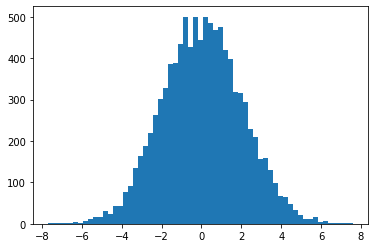

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kurtosis, skew


x_random = np.random.normal(0, 2, 10000)
plt.hist(x_random, bins='auto')
print ('Skewness =', skew(x_random))
print ('kurtosis =', kurtosis(x_random))

<a id="confidence_interval"> </a>
# Statistic - <span style="color:blue">  Confindence Interval </span>
</span> <a href="#table_content"> [Return to table]</a>

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#95% confidence interval in seconds

df = pd.read_csv('201904-capitalbikeshare-tripdata.csv')
sample_size = 200 
sample = np.random.choice(df.Duration, size=sample_size)
sample_mean = sample.mean()
z_critical = stats.norm.ppf(0.975)

sigma = df.Duration.std()
standard_error = sigma/np.sqrt(sample_size)
margin_of_error = z_critical * standard_error/np.sqrt(sample_size)

display(df.head(3))
confidence_interval = (sample_mean-margin_of_error, sample_mean+margin_of_error)
print(f'Confidence Interval in seconds {confidence_interval}')

,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type
0,313,2019-04-01 00:03:03,2019-04-01 00:08:16,31618,4th & East Capitol St NE,31630,15th & East Capitol St NE,W24063,Member
1,453,2019-04-01 00:07:37,2019-04-01 00:15:10,31119,14th & Belmont St NW,31298,15th & M St NW,W22080,Member
2,333,2019-04-01 00:09:31,2019-04-01 00:15:05,31203,14th & Rhode Island Ave NW,31519,1st & O St NW,W00276,Member


Confidence Interval in seconds (1134.0575188084035, 1182.8824811915965)


<a id="effect_sizes"> </a>
# Statistic - <span style="color:blue">  Effect Sizes  </span>
</span> <a href="#table_content"> [Return to table]</a>

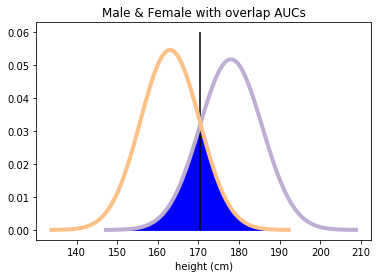

In [26]:
# Import SciPy stats and matplotlib for calculating and visualising effect size
import scipy.stats
import matplotlib.pyplot as plt
%matplotlib inline

def evaluate_PDF(rv, x=4):
    '''Input: a random variable object, standard deviation
    output : x and y values for the normal distribution
    '''
    
    # Identify the mean and standard deviation of random variable 
    mean = rv.mean()
    std = rv.std()

    # Use numpy to calculate evenly spaced numbers over the specified interval (4 sd) and generate 100 samples.
    xs = np.linspace(mean - x*std, mean + x*std, 100)
    
    # Calculate the peak of normal distribution i.e. probability density. 
    ys = rv.pdf(xs)

    return xs, ys # Return calculated values


# seed the random number generator so you get the same results
np.random.seed(10)

#Mean height and sd for males #### Generate a normal distribution for male heights 
male_mean = 178
male_sd = 7.7
male_height = scipy.stats.norm(male_mean, male_sd)

female_mean = 163
female_sd = 7.3
female_height = scipy.stats.norm(female_mean, female_sd)

#Get samples
male_sample = male_height.rvs(1000)
mean1, std1 = male_sample.mean(), male_sample.std()
female_sample = female_height.rvs(1000)
mean2, std2 = female_sample.mean(), female_sample.std()


#Calucalate the threshold----------------------------------------------------------------------
# Simple way of getting a threshold
simple_thresh = (mean1 + mean2) / 2

#Better way of getting a threshold
thresh = (std1 * mean2 + std2 * mean1) / (std1 + std2)


female_above_thresh = sum(female_sample > thresh)
male_below_thresh = sum(male_sample < thresh)

#Calculate ovelap & potential misclassification----------------------------------------------------
overlap = male_below_thresh / len(male_sample) + female_above_thresh / len(female_sample)
misclassification_rate = overlap / 2



# Threshold highlighted
# Male height
m_xs, male_ys = evaluate_PDF(male_height)
plt.plot(m_xs, male_ys, label='male', linewidth=4, color='#beaed4') 

#Female height 
f_xs, female_ys = evaluate_PDF(female_height)
plt.plot(f_xs, female_ys, label='female', linewidth=4, color='#fdc086')

plt.vlines(thresh,ymin=0,ymax=0.06)
plt.fill_betweenx(male_ys,x1 = m_xs,x2=thresh, where = m_xs < thresh,color='b')
plt.fill_betweenx(female_ys,x1=f_xs,x2=thresh, where = f_xs > thresh,color='b')
plt.xlabel('height (cm)')
plt.title('Male & Female with overlap AUCs');



<a id="cohen_d"> </a>
# Statistic - <span style="color:blue">  Cohen's D Effect Size Calculation   </span>
</span> <a href="#table_content"> [Return to table]</a>


### [Use Case]:
    In some instances the p-val may be unreliable due to an incredibly large sample size. It will be significant but it may not be something you care about. Cohen d effect size is more reliable due to not factoring in sample size n. 
    
    Cohen d measures the difference in means. Works with continuous data

>**Small effect = 0.2**

>**Medium Effect = 0.5**

>**Large Effect = 0.8**

2.0669285200851877


NameError: name 'overlap_superiority' is not defined

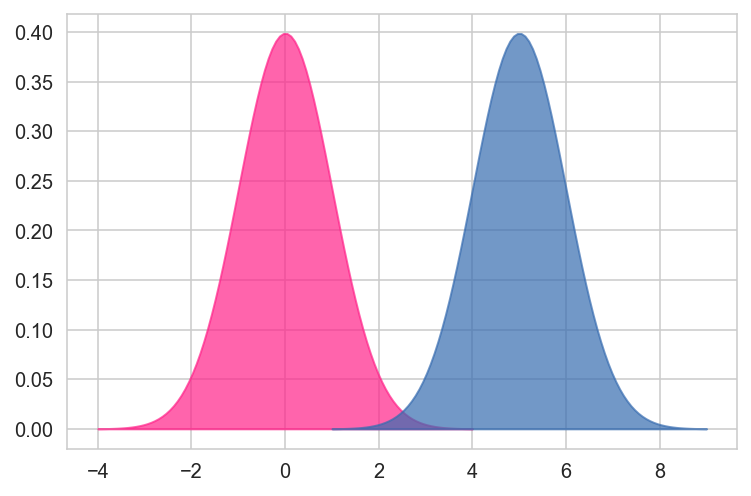

In [30]:
import scipy.stats
import matplotlib.pyplot as plt
%matplotlib inline

def plot_pdfs(cohen_d=2):
    """Plot PDFs for distributions that differ by some number of stds.
    
    cohen_d: number of standard deviations between the means
    """
    group1 = scipy.stats.norm(0, 1)
    group2 = scipy.stats.norm(cohen_d, 1)
    xs, ys = evaluate_PDF(group1)
    plt.fill_between(xs, ys, label='Group1', color='#ff2289', alpha=0.7)

    xs, ys = evaluate_PDF(group2)
    plt.fill_between(xs, ys, label='Group2', color='#376cb0', alpha=0.7)
    
    o, s = overlap_superiority(group1, group2)
    print('overlap', o)
    print('superiority', s)
    
def Cohen_d(group1, group2):

    # Compute Cohen's d.

    # group1: Series or NumPy array
    # group2: Series or NumPy array

    # returns a floating point number 

    diff = group1.mean() - group2.mean()

    n1, n2 = len(group1), len(group2)
    var1 = group1.var()
    var2 = group2.var()

    # Calculate the pooled threshold as shown earlier
    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    
    # Calculate Cohen's d statistic
    d = diff / np.sqrt(pooled_var)
    
    return d


# seed the random number generator so you get the same results
np.random.seed(10)

#Mean height and sd for males #### Generate a normal distribution for male heights 
male_mean = 178
male_sd = 7.7
male_height = scipy.stats.norm(male_mean, male_sd)

female_mean = 163
female_sd = 7.3
female_height = scipy.stats.norm(female_mean, female_sd)

#Get samples
male_sample = male_height.rvs(1000)
mean1, std1 = male_sample.mean(), male_sample.std()
female_sample = female_height.rvs(1000)
mean2, std2 = female_sample.mean(), female_sample.std()

print(Cohen_d(male_sample, female_sample))
plot_pdfs(5)

<a id="bayes"> </a>
# Statistic - <span style="color:blue">  Bayes   </span>
</span> <a href="#table_content"> [Return to table]</a>

<a id="poisson"> </a>
# Distribution - <span style="color:blue">  Poisson </span>
</span> <a href="#table_content"> [Return to table]</a>


#### [Use Case]
    allows you to calculate the probability of a given event happening by examining the mean number of events that happen in a given time period. Given a set time period, we can use the Poisson Distribution to predict how many times a given event will happen over that time period

#### [Formula]
$$p(x) = \frac{\lambda^xe^{-\lambda}}{x!}$$

$$\lambda = n*p$$

$$p = \frac{mew}{n} = 0.1$$

    n = time units (60min, 1hr, 500sec)
    x = number of desired successes within given n
    p = probability
    mew = average number of successes in given n
    lambda = expected values

In [63]:
"""
A fireman fights, on average, 4 fires per month. What is the 
probability that a fireman is called to two different fires this week?
"""
import numpy as np
from math import factorial
import scipy.stats as stats

#Way 1--------------------------------------------------------------
def poisson_probability(lambd, x):
    return ((lambd)**x * (np.exp(-lambd))) / factorial(x)

n = 4 #weeks
x = 2 #successes
mew = 4 #average successes per month
p = mew / n
lambd = n * p


#Way 2--------------------------------------------------------------
prob = poisson_probability(lambd, x)

print(prob)
print(stats.poisson.pmf(k=x, mu=lambd))

0.14652511110987343
0.14652511110987343


<a id="exponential"> </a>
# Distribution - <span style="color:blue"> Exponential </span>
</span> <a href="#table_content"> [Return to table]</a>


#### [Use Case]
    allows you to calculate the probability  distribution of the amount of time it takes before an event occurs. In a way, it solves the inverse of the problem solved by the Poisson Distribution

#### [Formula]
$$PDF(x) = \lambda e^{-\lambda x}$$

$$\lambda = \frac{1}{\mu}$$

$$CDF(x) = 1 - e^{-\lambda x}$$

    x = time in lenght + unit
    lambda = rate of decay
    mew = The average interval length is usually labeled as
    
    
    Steven is picking up a friend at the airport and their plane is late. The late flight is 22 minutes behind schedule. What is the probability that Steven will wait 30 minutes or less for his friend's flight to land?

In [8]:
import numpy as np
import scipy.stats as stats

# Way 1------------------------------------------------------------------------------
def exp_pdf(mu, x):
    decay_rate = 1 / mu
    return decay_rate * np.exp(-decay_rate * x)
    
def exp_cdf(mu, x):
    decay_rate = 1 / mu
    return 1 - np.exp(-decay_rate * x)

# Way 2------------------------------------------------------------------------------

print(exp_cdf(22, 30)) # Expected Output: 0.7442708400868994
#stats.expon.ppf(    )
#stats.expon.ppf(x=30, loc = 1/22, scale = 1)

0.7442708400868994


<a id="test_fast"> </a>
# Testing - <span style="color:blue"> Calculatinng Test (fast)</span>
</span> <a href="#table_content"> [Return to table]</a>

In [30]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(123) # set a seed to get the same results

populationA = np.random.normal(loc=530, scale=5.0, size=1000)
populationB = np.random.normal(loc=545, scale=6.0, size=1300)
populationC = np.random.normal(loc=535, scale=5.5, size=900)

sample1A = np.random.choice(populationA, size=100, replace=False, p=None)
sample2A = np.random.choice(populationA, size=70, replace=True, p=None)


#[One sample 1 tail z-test]
mu = populationA.mean() # Population mean(MEW)
sigma = populationA.std() #Standard error (sigma/sqrt(n))
x_bar = sample1A.mean() # sample mean
numerator = x_bar - mu
denominator = sigma
z_score = numerator/denominator
p_value = 1 - stats.norm.cdf(z_score)
print(f"""
[One sample 1 tail Z test] 
There is a 53% chance sample1A is from the populationA.
Fail to reject Ho
p-value = {p_value}""")
                             

 'INCOMPLETE'   
#[Two sample 1 tail z-test]
muA = populationA.mean() # Population mean(MEW)
sigmaA = populationA.std() #Standard error (sigma/sqrt(n))
nA = populationA.shape[0]
muB = populationB.mean() 
sigmaB = populationB.std() 
nB = populationB.shape[0]
standard_error = np.sqrt((sigmaA**2/nA) + (sigmaB**2/nB)) #Also known as standard deviation between populations
difference = np.abs(muA - muB)
numerator = difference
denominator = standard_error
z_score = numerator/denominator
p_value = 1 - stats.norm.cdf(z_score)

print(f"""\n\n
[Two sample 1 tail z-test] 
There is a 53% chance sample1A is from the populationA.
Fail to reject Ho
p-value = {p_value}""")   



#p_value = 1 - stats.t.cdf(z_score, df)

# #If given a z/t-score, calculate p-value this way. This assums standard normal distrubtion
# z_score = 2.3
# p_value = 1 - stats.norm.cdf(z_score)


# #[1 sample t test]. You'll need a sample and population mean
# results = stats.ttest_1samp(a= sample, popmean= mu) 

# #[2 sample t test]. you'll need two samples
# stats.ttest_ind(experimental, control)


# #[Welch test]
# stats.ttest_ind(sample1 sample2, equal_var=False)

# #[1 tails test] calculate the t score and degree of freedom
# p_value = stats.t.sf(t, df = len(sample))

# #[2 tail test](returns (tscore, pscore)) 
# stats.ttest_1samp(sample, popmean= 500)

# #stats.norm.ppf(.50, loc=45, scale=1)
# p_value


[One sample 1 tail Z test] 
There is a 53% chance sample1A is from the populationA.
Fail to reject Ho
p-value = 0.5366398250082426


<a id="one_sample_z_test"> </a>
# Testing - <span style="color:blue"> One sample Z - test </span>
</span> <a href="#table_content"> [Return to table]</a>

#### [Usecase]
       
    -When you want to check if a sample belong/came from a certain population

#### [Conditions] 

    -You have population mean
    -You have Population STD
    
    
25 students complete a preparation program for taking the SAT test. Here are the SAT scores from the 25 students who completed the program:

434 694 457 534 720 400 484 478 610 641 425 636 454 514 563 370 499 640 501 625 612 471 598 509 531

We know that the population average for SAT scores is 500 with a standard deviation of 100. Are our 25 students’ SAT scores significantly higher than the population's mean score? Note that the SAT preparation program claims that it will increase (and not decrease) the SAT score. So, you can conduct a one-directional test. (alpha = .05).

In [39]:
import math
import scipy.stats as stats
import numpy as np 

# Sample Data 
x = np.array([434, 694, 457, 534, 720, 400, 484, 478, 610, 641, 425, 636, 454, 514, 563, 370, 499, 640, 501, 625, 612, 471, 598, 509, 531])

#Parameter values = population values
mu = 500
sigma = 100
alpha = 0.05

#Statistic values= Sample values
x_bar = x.mean() # X_bar = mean of sample
n = len(x)       # sample size
standard_error = sigma/np.sqrt(n) # SD of sample calculated from population
 
z_score = (x_bar - mu)/(standard_error) # A measurement of deviations from the mean
p_value = 1 - stats.norm.cdf(z_score)   # The probablity density of the observation from the sample

print(f"""
p-value: {p_value} 
z-score/statistic/value: {z_score}
""")

# The p value is less than tha alpha so we can conclude that:
# the training has a SIGNIFICANT effect on the SAT outcome at a significance level of 0.05


p-value: 0.03593031911292577 
z-score/statistic/value: 1.8



<a id="one_sample_t_test"> </a>
# Testing - <span style="color:blue"> One sample T - test </span>
</span> <a href="#table_content"> [Return to table]</a>

#### [Usecase]
       
    -When you want to check if a sample belong/came from a certain population But don't have population parameters

#### [Conditions] 

    
    The population mean ( 𝜇 ): Given as 100 (from past data).
    The sample mean ( 𝑥¯ ): Calculate from the sample data
    The sample standard deviation ( 𝑠 ): Calculate from sample data
    Number of observations( 𝑛 ): 25 as given in the question. This can also be calculated from the sample data.
    Degrees of Freedom( 𝑑𝑓 ): Calculate from the sample as df = total no. of observations - 1

The t-value for sample is 3.58 and the p-value is 0.0015
Null hypothesis rejected. Results are statistically significant with t-value = 3.58 and p-value = 0.0015


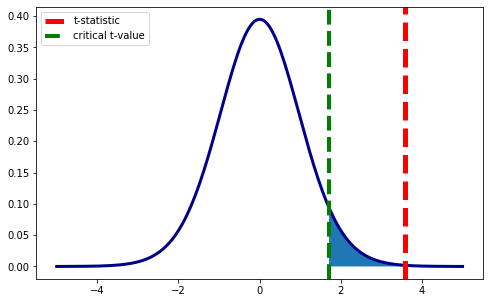

In [27]:
import numpy as np
from scipy import stats 
import math

# For visualizing distributions - optional 
import seaborn as sns
import matplotlib.pyplot as plt
sample = np.array([122.09, 100.64, 125.77, 120.32, 118.25,  96.47, 111.4 , 80.66,
       110.77, 111.14, 102.9 , 114.54,  88.09,  98.59,  87.07, 110.43,
       101.9 , 123.89,  97.03, 116.23, 108.3 , 112.82, 119.57, 131.38,
       128.39])
# Population mean (μ)
mu = 100 

# Sample mean (x̄) using NumPy mean()
x_bar = sample.mean()

# Sample Stadrad Deviation (sigma) using Numpy
sigma = np.std(sample,ddof=1)

# Sample size (n)
n = len(sample)

# Degrees of Freedom
df = n-1

# Difference in sample mean 
diff = x_bar - mu

#𝐻0:𝜇  = $100.
#𝐻1:𝜇  > $100
#α = 0.05

t = (x_bar -  mu)/(sigma/np.sqrt(n))

# Calculate critical t-value
t_crit = np.round(stats.t.ppf(1 - 0.05, df=24),3)

 # Calculate the t-value and p-value 
results = stats.ttest_1samp(a= sample, popmean= mu)  


print ("The t-value for sample is", round(results[0], 2), "and the p-value is", np.round((results[1]), 4))

if (results[0]>t_crit) and (results[1]<0.05):
    print ("Null hypothesis rejected. Results are statistically significant with t-value =", 
           round(results[0], 2), "and p-value =", np.round((results[1]), 4))
else:
    print ("Null hypothesis is Accepted")
    
    
# generate points on the x axis between -5 and 5:
xs = np.linspace(-5, 5, 200)

# use stats.t.pdf to get values on the probability density function for the t-distribution
# the second argument is the degrees of freedom
ys = stats.t.pdf(xs, df, 0, 1)

# initialize a matplotlib "figure"
fig = plt.figure(figsize=(8,5))

# get the current "axis" out of the figure
ax = fig.gca()

# plot the lines using matplotlib's plot function:
ax.plot(xs, ys, linewidth=3, color='darkblue')

# plot a vertical line for our measured difference in rates t-statistic
ax.axvline(t, color='red', linestyle='--', lw=5,label='t-statistic')

ax.axvline(t_crit,color='green',linestyle='--',lw=4,label='critical t-value')
ax.fill_betweenx(ys,xs,t_crit,where= xs > t_crit)

ax.legend()
plt.show()

<a id="two_sample_t_test"> </a>
# Testing - <span style="color:blue"> Two sample T - test </span>
</span> <a href="#table_content"> [Return to table]</a>

#### [Usecase]
       
    -When you want to check if a two populations means are related

#### [Formula]

$$\large t = \frac{\bar{x}_{1} - \bar{x}_{2}}{\sqrt{s^{2}_{p} (\frac{1}{n_{1}} + \frac{1}{n_{2}}) }    }  $$

Where $s^{2}_{p}$ is the pooled sample variance, calculated as:

$$\large s^{2}_{p}  = \frac{(n_{1} -1)s^{2}_{1} +  (n_{2} -1)s^{2}_{2}}{n_{1} + n_{2} - 2}  $$


Where $s^{2}_{1}$ and $s^{2}_{2}$ are the variances for each sample given by the formula 
$$ \large s^{2} = \frac{\sum_{i=1}^{n}(x_{i} - \bar{x})^{2}}{n-1} $$

In [28]:
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline


# Use this sample data to conduct experimentation

control = np.array([166, 165, 120,  94, 104, 166,  98,  85,  97,  87, 114, 100, 152,
                    87, 152, 102,  82,  80,  84, 109,  98, 154, 135, 164, 137, 128,
                    122, 146,  86, 146,  85, 101, 109, 105, 163, 136, 142, 144, 140,
                    128, 126, 119, 121, 126, 169,  87,  97, 167,  89, 155])

experimental = np.array([ 83, 100, 123,  75, 130,  77,  78,  87, 116, 116, 141,  93, 107,
                         101, 142, 152, 130, 123, 122, 154, 119, 149, 106, 107, 108, 151,
                         97,  95, 104, 141,  80, 110, 136, 134, 142, 135, 111,  83,  86,
                         116,  86, 117,  87, 143, 104, 107,  86,  88, 124,  76])
difference = control.mean() - experimental.mean()


def sample_variance(sample):
    n = len(sample)
    x_bar = sample.mean()
    
    summation = np.sum((sample - x_bar)**2)    
    samp_var = summation/(n-1)
    
    return samp_var

def pooled_variance(sample1, sample2):
    n1 = len(sample1)
    n2 = len(sample2)
    samp_var1 = sample_variance(sample1)
    samp_var2 = sample_variance(sample2)
    
    pool_samp_var = (((n1 - 1)*samp_var1) + ((n2 - 1)*samp_var2)) / (n1 + n2 - 2)
    
    return pool_samp_var

def twosample_tstatistic(expr, ctrl):
    x_bar1 = expr.mean()
    x_bar2 = ctrl.mean()
    pool_samp_var = pooled_variance(expr, ctrl)
    n1 = len(expr)
    n2 = len(ctrl)
    
    t_statistic = (x_bar1 - x_bar2)/np.sqrt(pool_samp_var*((1/n1) + (1/n2)))
    
    return t_statistic

# Visualize t and p_value

def visualize_t(t_stat, n_control, n_experimental):

    # initialize a matplotlib "figure"
    fig = plt.figure(figsize = (12, 7))
    
    # generate points on the x axis between -4 and 4:
    ax = fig.gca()
    xs = np.linspace(-4, 4, 500)
       
    # use stats.t.pdf to get values on the probability density function for the t-distribution
    crit = stats.t.ppf(1-0.025, (n_control+n_experimental-2))
    
    # Draw two sided boundary for critical-t
    ys= stats.t.pdf(xs, (n_control+n_experimental-2), 0, 1)
    ax.plot(xs, ys, linewidth=3, color='darkred')

    ax.axvline(crit, color='black', linestyle='--', lw=5)
    ax.axvline(-crit, color='black', linestyle='--', lw=5)
    
    plt.show()
    return None

#Calculate t sscore
t_stat = twosample_tstatistic(experimental, control)

n_control = len(control)
n_experimental = len(experimental)

## Calculate p_value
# Lower tail comulative density function returns area under the lower tail curve
lower_tail = stats.t.cdf(-1.89, (50+50-2), 0, 1)
# Upper tail comulative density function returns area under upper tail curve
upper_tail = 1. - stats.t.cdf(1.89, (50+50-2), 0, 1)

p_value = lower_tail+upper_tail


# This is every thing above in one line of code. We fail to reject the H0
stats.ttest_ind(experimental, control)

Ttest_indResult(statistic=-1.8915462966190273, pvalue=0.061504240672530394)

<a id="Welch_t_test"> </a>
# Testing - <span style="color:blue"> Welch's T - test </span>
</span> <a href="#table_content"> [Return to table]</a>



 $ \Large t = \frac{\bar{X_1}-\bar{X_2}}{\sqrt{\frac{s_1^2}{N_1} + \frac{s_2^2}{N_2}}} = \frac{\bar{X_1}-\bar{X_2}}{\sqrt{se_1^2+se_2^2}}$
where  

* $\bar{X_i}$ - mean of sample i
* $s_i^2$ - variance of sample i
* $N_i$ - sample size of sample i  


Degrees of freedom
$ \Large v \approx \frac{\left( \frac{s_1^2}{N_1} + \frac{s_2^2}{N_2}\right)^2}{\frac{s_1^4}{N_1^2v_1} + \frac{s_2^4}{N_2^2v_2}} $

In [32]:
import scipy.stats as stats


p = 1 - stats.t.cdf(t, df)

<a id="anova_table"> </a>
# Testing - <span style="color:blue">ANOVA Table </span>
</span> <a href="#table_content"> [Return to table]</a>

#### [Usecase]
ANOVA (Analysis of Variance) is a method for generalizing statistical tests to multiple groups ANOVA analyses the overall variance of a dataset by partitioning the total sum of squared deviations (from the mean) into the sum of squares for each of these groups and sum of squares for error.ANOVA is looking to explain the total variance as combinations of variance from the various groups, you typically design a multiple groups experiment to test various independent factors that we hypothesize may influence the overall result


#### [Formula]
    Control_Column ~ C(factor_col1) + factor_col2 + C(factor_col3) + ... + X
    where is C() represents a catagorical value. 

In [3]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Your code here

df = pd.read_csv('ToothGrowth.csv')
display(df.head(3))

formula = 'len ~ C(supp) + C(dose)'
lm = ols(formula, df).fit()
table = sm.stats.anova_lm(lm, typ=2)
print(table)
print('Both have significant effect on len. supp have more effect')

,len,supp,dose
0,4.2,VC,0.5
1,11.5,VC,0.5
2,7.3,VC,0.5


               sum_sq    df          F        PR(>F)
C(supp)    205.350000   1.0  14.016638  4.292793e-04
C(dose)   2426.434333   2.0  82.810935  1.871163e-17
Residual   820.425000  56.0        NaN           NaN


<a id="power_beta"> </a>
# Testing - <span style="color:blue">Power Analysis Recommendation & Power Curve </span>
</span> <a href="#table_content"> [Return to table]</a>

#### [Usecase]
Power calculation is used to reduce type 2 error. If you know 3 parameters you can recommend the last. It truely depends on what you're trying to do. 
    
    -Alpha
    -Power
    -sample size
    -effect size


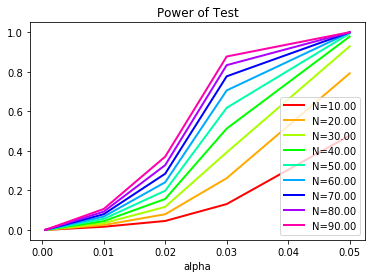

Sample Size: 25.525 25.524572500479355


In [13]:
import numpy as np
from matplotlib import pyplot
%matplotlib inline
from statsmodels.stats.power import TTestIndPower
analysis = TTestIndPower()

# parameters for power analysis
effect = 0.8
alpha = 0.05
power = 0.8
n = 25


#It will return the parameter that was set to none. 
result = TTestIndPower().solve_power(effect_size=effect, power=power, nobs1=None, ratio=1, alpha=alpha)
result2 = analysis.solve_power(effect_size=effect, power=power, nobs1=None, ratio=1, alpha=alpha)



# parameters for power analysis
alpha_values = np.array([0.0005, 0.01, 0.02, 0.03, 0.05])
sample_sizes = np.array(range(10, 100, 10))
effect_sizes = np.array([0.02, 0.2, 0.3, 0.5, 0.9])

# calculate power curves from multiple power analyses
analysis = TTestIndPower()
analysis.plot_power(dep_var='alpha', effect_size=effect_sizes, nobs=sample_sizes, alpha=alpha_values)
pyplot.show()


#Given effect, alpha, and power you can reccomend a good sample size of 25
print('Sample Size: %.3f' % result,result2)